In [2]:
from datetime import datetime, timedelta
import copy 
import pickle 
from astropy.io import fits

import download
import stations
import analysis
import events
import data
import correlation
import reference
import const

%load_ext autoreload
%autoreload 2

In [3]:
_year = 2022
_month = 1
_day = 3
_days = 2

nobg = True
bin_f = False
bin_t = False
flatten = True
bin_t_w = 4
flatten_w = 400
r_w = 180

limit = 0.6

date_start = datetime(year=_year, month=_month, day=_day)
time_step = timedelta(days=1)
number_days = _days

observatory = stations.getStations(date_start)
print(observatory)

for i in range(number_days):
    date = date_start + time_step * i
    year = date.year
    month = date.month
    day = date.day
    download.downloadFullDay(date_start, station=observatory)
    sets = []
    for j in observatory:
        sets.extend(data.listDataPointDay(date_start, station=j))
    e_list = events.EventList([])
    for set1 in range(len(sets)):
        for set2 in range(set1 + 1, len(sets)):
            data1_raw = copy.deepcopy(sets[set1])
            data2_raw = copy.deepcopy(sets[set2])
            data1, data2 = data.fitTimeFrameDataSample(data1_raw, data2_raw)
            if data1 and data2:
                corr = correlation.Correlation(data1, data2, day, _no_background=nobg, _bin_freq=bin_f,
                                               _bin_time=bin_t, _flatten=flatten, _bin_time_width=bin_t_w,
                                               _flatten_window=flatten_w, _r_window=r_w)
                corr.calculatePeaks(_limit=limit)
                e_list += corr.peaks
            else:
                pass
    e_list.sort()
    analysis.saveData(e_list, year, month, day)
    #print(f"\n {date.year} {date.month} {date.day}")
    #print("mine")
    #print(e_list)
    #print("reference SWPC")
    #print(reference.referenceSWPC(year, month, day))
    #print("reference Monstein")
    #print(reference.referenceMonstein(year, month, day))
    #print("reference Monstein with 2 or more stations")
    #print(reference.referenceMonstein2orMore(year, month, day))

[ALASKA-COHOE, ALASKA-COHOE, ALASKA-HAARP, ALASKA-HAARP, ALGERIA-CRAAG, ALMATY, AUSTRIA-Krumbach, AUSTRIA-OE3FLB, AUSTRIA-UNIGRAZ, Arecibo-Observatory, Arecibo-Observatory, Australia-ASSA, Australia-ASSA, Australia-LMRO, BIR, DENMARK, EGYPT-Alexandria, EGYPT-Alexandria, GLASGOW, HUMAIN, HURBANOVO, INDIA-GAURI, INDIA-Nashik, INDIA-OOTY, INDIA-OOTY, INDIA-UDAIPUR, INDONESIA, KASI, MEXART, MONGOLIA-UB, MRO, MRO, MRO, MRO, ROSWELL-NM, SOUTHAFRICA-SANSA, SPAIN-PERALEJOS, SPAIN-PERALEJOS, SWISS-HB9SCT, SWISS-IRSOL, SWISS-Landschlacht, SWISS-Landschlacht, SWISS-MUHEN, SWISS-MUHEN, TRIEST, URUGUAY]
failed to open f:/programming/eCallistoRadioBursts/eCallistoData/2022/01/03/INDONESIA_20220103_233000_59.fit.gz
failed to open f:/programming/eCallistoRadioBursts/eCallistoData/2022/01/02/INDONESIA_20220102_070000_59.fit.gz
failed to open f:/programming/eCallistoRadioBursts/eCallistoData/2022/01/03/MEXART_20220103_180000_59.fit.gz


c:\Users\Lukas\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\window\rolling.py:321: UserWarning: Warning: converting a masked element to nan.
  values = ensure_float64(values)
f:\programming\eCallistoRadioBursts\data.py:254: UserWarning: Warning: converting a masked element to nan.
  arr = np.array(self.summedCurve)
C:\Users\Lukas\AppData\Roaming\Python\Python38\site-packages\numpy\lib\nanfunctions.py:1212: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


failed to open f:/programming/eCallistoRadioBursts/eCallistoData/2022/01/03/INDONESIA_20220103_233000_59.fit.gz
failed to open f:/programming/eCallistoRadioBursts/eCallistoData/2022/01/02/INDONESIA_20220102_070000_59.fit.gz
failed to open f:/programming/eCallistoRadioBursts/eCallistoData/2022/01/03/MEXART_20220103_180000_59.fit.gz


In [4]:
import os
os.system('shutdown -s')
pass

0

In [ ]:
file= const.pathDataDay(2022,1,1)+"ALASKA-COHOE_20220101_181500_01.fit.gz"
stations.getStationFromFile(file)

old

In [ ]:
_year = 2022
_month = 1
_day = 3 
_days = 2

nobg=True
bin_f=False
bin_t=False
flatten=True
bin_t_w=4
flatten_w=400
r_w=180
spec_range = [45, 81]

limit = 0.6

date_start = datetime(year=_year, month=_month, day=_day)
time_step = timedelta(days=1)
number_days = _days

observatory = [observatories.uni_graz, observatories.triest, observatories.swiss_landschlacht, observatories.oe3flb,
               observatories.alaska_haarp, observatories.alaska_cohoe, observatories.roswell, observatories.bir,
               observatories.indonesia, observatories.assa, observatories.swiss_muhen, observatories.swiss_hb9sct,
               observatories.egypt_alexandria, observatories.arecibo, observatories.swiss_heiterswil, observatories.humain,
               observatories.glasgow, observatories.greenland]

events_day = []
for i in range(number_days):
    date = date_start + time_step * i
    year = date.year
    month = date.month
    day = date.day
    download.downloadFullDay(year, month, day, observatory)
    stations = download.observatoriesAvailable(year, month, day)[1]
    sets = []
    for j in stations:
        sets.extend(data.listDataPointDay(year, month, day, j, spec_range))
    events = events.EventList([])
    for set1 in range(len(sets)):
        for set2 in range(set1 + 1, len(sets)):
            data1_raw = copy.deepcopy(sets[set1])
            data2_raw = copy.deepcopy(sets[set2])
            data1, data2 = data.fitTimeFrameDataSample(data1_raw, data2_raw)
            if data1 and data2:
                corr = correlation.Correlation(data1, data2, day, _no_background=nobg, _bin_freq=bin_f,
                                               _bin_time=bin_t, _flatten=flatten, _bin_time_width=bin_t_w,
                                               _flatten_window=flatten_w, _r_window=r_w)
                corr.calculatePeaks(_limit=limit)
                events += corr.peaks
            else:
                pass
    events.sort()
    events_day.append(events)
    #print(f"\n {date.year} {date.month} {date.day}")
    #print("mine")
    #print(events)
    #print("reference SWPC")
    #print(reference.referenceSWPC(year, month, day))
    #print("reference Monstein")
    #print(reference.referenceMonstein(year, month, day))
    #print("reference Monstein with 2 or more stations")
    #print(reference.referenceMonstein2orMore(year, month, day))
# return events_day

In [ ]:
events_day

In [ ]:
r = 1
for i in events_day:
    print(r)
    r += 1
    for j in i:
        print(j, j.stations)
        # print(observatories.ObservatorySet(j.stations).getSet())

In [ ]:
events_day_checked = []
for list_day in events_day:
    e_list = analysis.EventList([])
    for event in list_day:
        obs = observatories.ObservatorySet(event.stations)
        event_time = event.time_start
        event_time_ahead = event_time - timedelta(minutes=15)
        set_obs = obs.getSet()
        for i in set_obs:
            try:
                dp11 = data.createFromTime(event_time.year, event_time.month, event_time.day, str(event.time_start), i[0], spec_range)
                dp12 = data.createFromTime(event_time_ahead.year, event_time_ahead.month, event_time_ahead.day, str(event.time_start-timedelta(minutes=15)), i[0], spec_range)
                dp21 = data.createFromTime(event_time.year, event_time.month, event_time.day, str(event.time_start), i[1], spec_range)
                dp22 = data.createFromTime(event_time_ahead.year, event_time_ahead.month, event_time_ahead.day, str(event.time_start-timedelta(minutes=15)), i[1], spec_range)
                dp1, dp2 = data.fitTimeFrameDataSample([sum([dp11,dp12])], [sum([dp21,dp22])])
            except TypeError:
                continue
            except:                
                dp1 = data.createFromTime(event_time.year, event_time.month, event_time.day, str(event.time_start), i[0], spec_range)     
                dp2 = data.createFromTime(event_time.year, event_time.month, event_time.day, str(event.time_start), i[1], spec_range)       

            cor = correlation.Correlation(dp1, dp2, day,  
                                          _flatten=True, _bin_time=True, _bin_freq=True, _no_background=True,
                                          _r_window=30)
            cor.calculatePeaks()
            e_list += cor.peaks
    events_day_checked.append(e_list)

In [ ]:
events_day_checked = []
for list_day in events_day:
    e_list = analysis.EventList([])
    for event in list_day:
        obs = observatories.ObservatorySet(event.stations)
        year = event.time_start.year
        month = event.time_start.month
        day = event.time_start.day
        set_obs = obs.getSet()
        for i in set_obs:
            dp1 = data.createFromTime(year, month, day, str(event.time_start), i[0], spec_range)      # needs to search for the file before this one (if close to start fo file)  [ - timedelta(minutes=15)]
            dp2 = data.createFromTime(year, month, day, str(event.time_start), i[1], spec_range)            # same here  , also data.fitTimeFrameDataSample(), because reasons
            cor = correlation.Correlation(dp1, dp2, day,  
                                          _flatten=True, _bin_time=True, _bin_freq=True, _no_background=True,
                                          _r_window=30)
            cor.calculatePeaks()
            e_list += cor.peaks
    events_day_checked.append(e_list)

In [ ]:
events_day_checked

In [ ]:
# _days = 28
ref_swpc = [reference.referenceSWPC(year, month, i) for i in range(_day, _day + _days)]
ref_monstein = [reference.referenceMonstein(year, month, i) for i in range(_day, _day + _days)]
ref_monstein2p = [reference.referenceMonstein2orMore(year, month, i) for i in range(_day, _day + _days)]
ref_swpc_strong = [analysis.EventList([j for j in i if j.burst_type == "III/2" or j.burst_type == "III/3"]) for i in ref_swpc]
# events with burst_type.startswith(III/) or (II/)  ??

events_num = sum(len(i) for i in events_day[:_days])

events_swpc = sum(len(i)for i in ref_swpc[:_days])
events_swpc_strong = sum(len(i)for i in ref_swpc_strong[:_days])

events_monstein = sum(len(i)for i in ref_monstein[:_days])
events_monstein2p = sum(len(i)for i in ref_monstein2p[:_days])

false_positives_all = []
missed_strong_all = []
missed_swpc_all = []
missed_monstein_all = []
missed_monstein2p_all = []
for i in range(_day, _day + _days):
    false_positives = (events_day[i-1] - ref_swpc[i-1]) - ref_monstein[i-1]
    false_positives_all.extend(false_positives)
    print(f"\n{year} {month} {i}\nfalse positives: ", false_positives)

    missed_swpc = ref_swpc[i-1] - events_day[i-1]
    print(f"missed swpc:", missed_swpc)
    missed_swpc_all.extend(missed_swpc)

    missed_monstein = ref_monstein[i-1] - events_day[i-1]
    print(f"missed monstein:", missed_monstein)
    missed_monstein_all.extend(missed_monstein)

    missed_monstein2p = ref_monstein2p[i-1] - events_day[i-1]
    print(f"missed monstein measured at 2+ of my stations:", missed_monstein2p)
    missed_monstein2p_all.extend(missed_monstein2p)

    missed_strong = ref_swpc_strong[i-1] - events_day[i-1]
    print(f"missed strong:", missed_strong)
    missed_strong_all.extend(missed_strong)

print(f"\n------------------------------\nEvents found: {events_num}")
print(f"False positives: {len(false_positives_all)} ({len(false_positives_all)/events_num*100}%)")
print(f"\nFailed bursts SWPC: {len(missed_swpc_all)} ({len(missed_swpc_all)/events_swpc*100}%)")
print(f"Failed bursts SWPC (strong): {len(missed_strong_all)} ({len(missed_strong_all)/events_swpc_strong*100}%)")
print(f"Failed bursts Monstein: {len(missed_monstein_all)} ({len(missed_monstein_all)/events_monstein*100}%)")
print(f"Failed bursts Monstein measured at >=2 stations: {len(missed_monstein2p_all)} ({len(missed_monstein2p_all)/events_monstein2p*100}%)")

In [1]:
import data
import analysis
import datetime
import realtime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

realtime.getFilesFromExtern()
files = realtime.getFiles()
files = [i for i in files if i]
if len(files) < 2:
    raise AttributeError("Not Enough Stations")
data_points = [sum(data.DataPoint(i) for i in j) for j in files]
if len(data_points) == 2:
    dp1, dp2, cor = analysis.calcPoint(datetime.datetime.today(), dp1=data_points[0], dp2=data_points[1],
                                       obs1=data_points[0].observatory, obs2=data_points[1].observatory)
    analysis.plotEverything(dp1, dp2, cor)
else:
    dp1, dp2, cor = analysis.calcPoint(datetime.datetime.today(), dp1=data_points[0], dp2=data_points[1],
                                       obs1=data_points[0].observatory, obs2=data_points[1].observatory)
    analysis.plotEverything(dp1, dp2, cor)

In [3]:
z = pd.Series(dp1.summedCurve).rolling(30).corr(pd.Series(dp2.summedCurve)).replace([np.inf, -np.inf], np.nan).tolist()

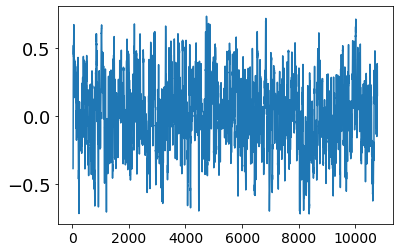

In [4]:
plt.plot(z)
plt.show()

In [1]:
import events, realtime, data, copy, analysis, datetime

%load_ext autoreload
%autoreload 2

In [10]:
if True:
    realtime.getFilesFromExtern()
    files = realtime.getFiles()
    files = [i for i in files if i]
    if len(files) < 2:
        raise AttributeError("Not Enough Stations")
    data_points = [sum(data.DataPoint(i) for i in j) for j in files]
    event_list = events.EventList([])

    mask_frq = True
    limit = 0.8
    flatten = True
    bin_time = True
    bin_frq = False
    no_bg = True
    r_window = 30

    if len(data_points) == 2:
        dp1, dp2, cor = analysis.calcPoint(datetime.datetime.today(), data_point_1=data_points[0],
                                           data_point_2=data_points[1],
                                           obs1=data_points[0].observatory, obs2=data_points[1].observatory,
                                           mask_frq=mask_frq, limit=limit, flatten=flatten, bin_time=bin_time, bin_freq=bin_frq,
                                           no_bg=no_bg, r_window=r_window)
        event_list += cor.peaks
    else:
        dp00 = copy.deepcopy(data_points[0])
        dp01 = copy.deepcopy(data_points[1])
        dp_01, dp_02, cor1 = analysis.calcPoint(datetime.datetime.now(), data_point_1=dp00, data_point_2=dp01,
                                            obs1=data_points[0].observatory, obs2=data_points[1].observatory,
                                            mask_frq=mask_frq, limit=limit, flatten=flatten, bin_time=bin_time, bin_freq=bin_frq,
                                            no_bg=no_bg, r_window=r_window)
        try:
            event_list += cor1.peaks
        except AttributeError:
            pass
        dp10 = copy.deepcopy(data_points[0])
        dp11 = copy.deepcopy(data_points[2])
        dp_01, dp_02, cor2 = analysis.calcPoint(datetime.datetime.now(), data_point_1=dp10, data_point_2=dp11,
                                            obs1=data_points[0].observatory, obs2=data_points[1].observatory,
                                            mask_frq=mask_frq, limit=limit, flatten=flatten, bin_time=bin_time, bin_freq=bin_frq,
                                            no_bg=no_bg, r_window=r_window)
        try:
            event_list += cor2.peaks
        except AttributeError:
            pass

        dp20 = copy.deepcopy(data_points[1])
        dp21 = copy.deepcopy(data_points[2])
        dp_01, dp_02, cor3 = analysis.calcPoint(datetime.datetime.now(), data_point_1=dp20, data_point_2=dp21,
                                            obs1=data_points[0].observatory, obs2=data_points[1].observatory,
                                            mask_frq=mask_frq, limit=limit, flatten=flatten, bin_time=bin_time, bin_freq=bin_frq,
                                            no_bg=no_bg, r_window=r_window)
        try:
            event_list += cor3.peaks
        except AttributeError:
            pass
    if event_list:
        station_names_list = [i.observatory.name for i in data_points]
        if len(data_points) == 2:
            station_names = f"{station_names_list[0]} and {station_names_list[1]}"
        else:
            station_names = f"{station_names_list[0]}, {station_names_list[1]} and {station_names_list[2]}"
        print(f"Events found at {station_names}.")
        print(event_list)
    else:
        print("No Event found.")


2022_10_3_AUSTRIA-UNIGRAZ_AUSTRIA-OE3FLB_30_nobg_bintime_4_flatten_2000.png
[['III', 15:59:19, 15:59:43, '0.8619'], ['III', 16:04:05, 16:04:10, '0.8176']]


C:\Users\Lukas\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
f:\programming\eCallistoRadioBursts\data.py:220: UserWarning: Warning: converting a masked element to nan.
  self.spectrum_data.data = np.array(data_binned)


2022_10_3_AUSTRIA-UNIGRAZ_SWISS-Landschlacht_30_nobg_bintime_4_flatten_2000.png
[]
2022_10_3_AUSTRIA-OE3FLB_SWISS-Landschlacht_30_nobg_bintime_4_flatten_2000.png
[['III', 15:56:43, 15:56:55, '0.8163']]
No Event found.


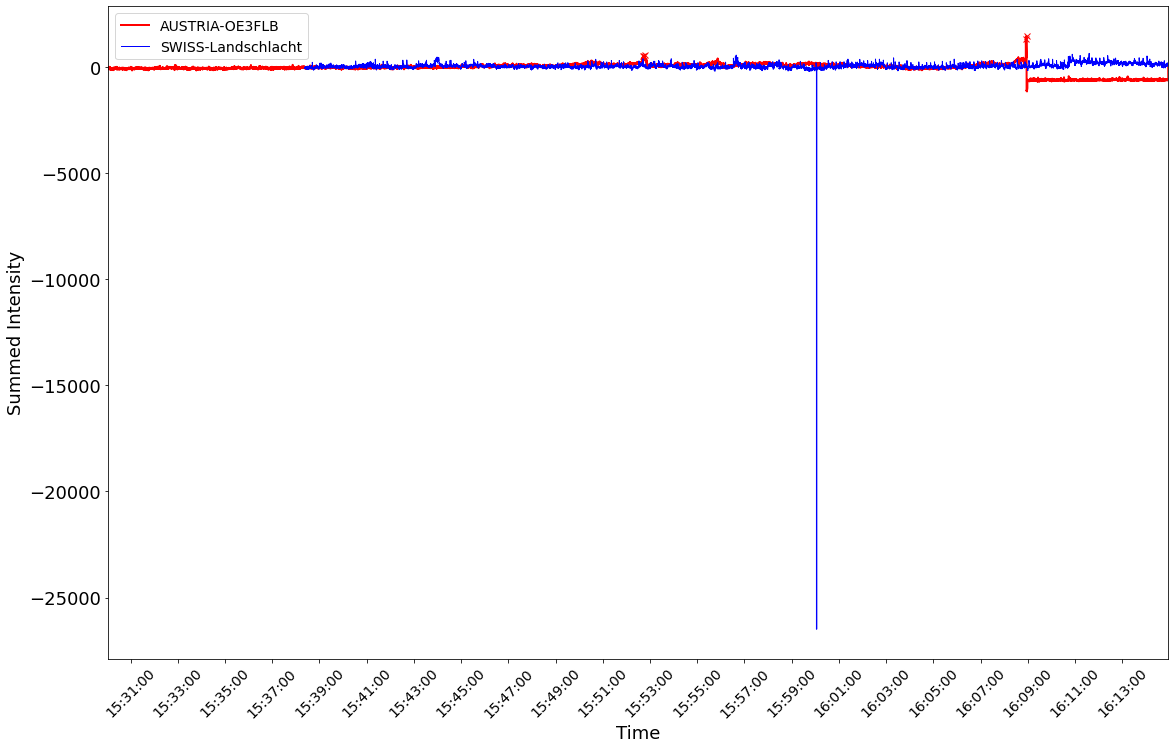

[]


[]

In [38]:
analysis.peaksInData(dp1, dp2, plot=True)

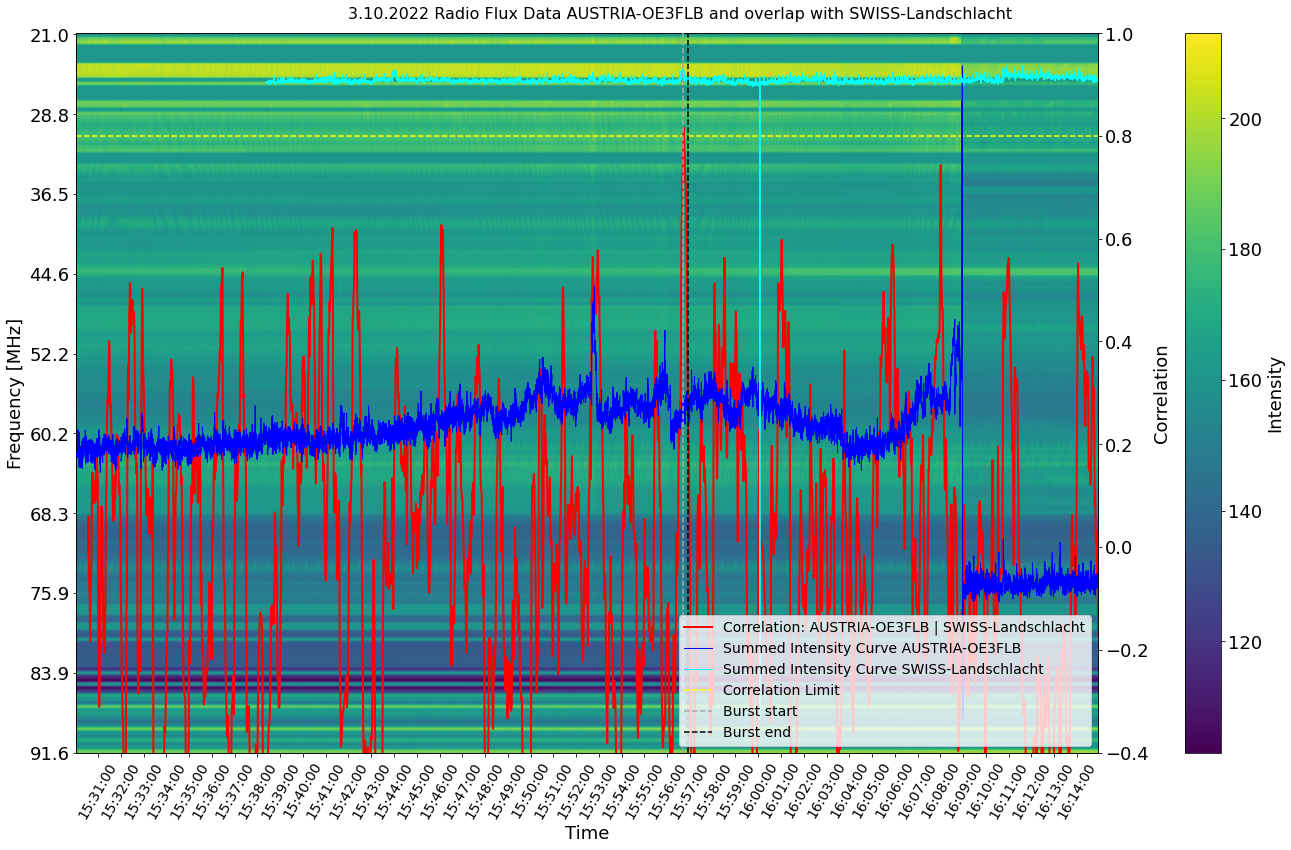

In [11]:
analysis.plotEverything(dp1,dp2,cor3)

In [3]:
cor1.data_curve

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan